In [12]:
import logging
import matplotlib.pyplot as plt
from pyscf import gto, scf
from scf_guess.metrics import f_score

In [18]:
# Try turning symmetry on and off
mol = gto.M(
    atom="../data/test_data/geometries/W4-17/ch.xyz",
    basis="pcseg-0",
    spin=1,
    symmetry=False,
)

In [19]:
mf = scf.UHF(mol).run()

init_dm = mf.get_init_guess(key="hcore")
S = mf.get_ovlp()

# Run SCF
# mf.kernel()
# Run stability analysis for the SCF wave function
mo1, _, stable, _ = mf.stability(verbose=logging.INFO, return_status=True)
while not stable:
    dm1 = mf.make_rdm1(mo1, mf.mo_occ)
    mf = mf.run(dm1)
    mo1, _, stable, _ = mf.stability(verbose=logging.INFO, return_status=True)

conv_dm = mf.make_rdm1()
if mol.spin == 0:
    conv_dm /= 2
    init_dm /= 2

converged SCF energy = -38.1621933154903  <S^2> = 0.75322257  2S+1 = 2.00322
tol 0.0001  toloose 0.01
max_cycle 50  max_space 20  max_memory 4000  incore True
davidson 0 1  |r|= 1.49  e= [1.08309849]  max|de|= 1.08  lindep= 0.996
Old state -> New state
    0     ->     1 
davidson 1 2  |r|=  1.5  e= [0.27944202 1.09814186]  max|de|= 0.279  lindep= 0.881
Old state -> New state
    0     ->     1 
    1     ->     2 
davidson 2 4  |r|= 1.17  e= [0.2023621  0.27211136 1.33843215]  max|de|= 1.34  lindep= 0.902
Old state -> New state
    0     ->     2 
davidson 3 7  |r|= 0.589  e= [0.01957577 0.24196943 0.28641868]  max|de|= -0.183  lindep= 0.882
Old state -> New state
    1     ->     2 
davidson 4 10  |r|= 0.727  e= [-0.00441134  0.03022944  0.25815426]  max|de|= 0.0302  lindep= 0.646
Old state -> New state
    1     ->     0 
    0     ->     1 
davidson 5 13  |r|= 0.0882  e= [-6.04716453e-02  1.13341508e-04  2.55515059e-01]  max|de|= -0.0907  lindep= 0.823
davidson 6 16  |r|= 0.0172  e

In [37]:
mf2 = scf.UHF(mol).run()
mo2, _, stable, _ = mf2.stability(verbose=logging.NOTSET, return_status=True)
while not stable:
    mf = mf2.run(mf2.make_rdm1(mo2, mf2.mo_occ))
    mo2, _, stable, _ = mf2.stability(verbose=logging.NOTSET, return_status=True)
conv_dm2 = mf2.make_rdm1()

converged SCF energy = -38.1621933154903  <S^2> = 0.75322257  2S+1 = 2.00322
converged SCF energy = -38.1648039598814  <S^2> = 1.0575298  2S+1 = 2.2869454


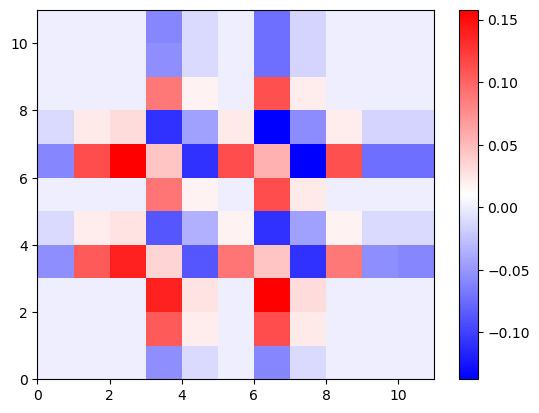

In [38]:
fig, axes = plt.subplots(ncols=1)

p = axes.pcolormesh(conv_dm2[0] - conv_dm[0], cmap="bwr")
plt.colorbar(p)

In [39]:
print(f_score(S, conv_dm[0], init_dm[0], conv_dm[1], init_dm[1]))
print(f_score(S, conv_dm2[0], init_dm[0], conv_dm2[1], init_dm[1]))

0.562576989164724
0.5594357705252324
